# U.S. Census Data API in Python

by Avery Fernandez and Michael T. Moen

The U.S. Census Data API provides programmatic access to demographic, economic, and geographic data collected by the U.S. Census Bureau. It enables users to retrieve and analyze a wide variety of data sets, including Census surveys and population statistics.

Please see the following resources for more information on API usage:
- Documentation
    - <a href="https://www.census.gov/data/developers/data-sets.html" target="_blank">U.S. Census Bureau API Datasets</a>
    - <a href="https://www.census.gov/data/developers/guidance/api-user-guide.html" target="_blank">U.S. Census Bureau API User Guide</a>
    - <a href="https://www.census.gov/data/developers/about.html" target="_blank">U.S. Census Bureau API Overview</a>
    - <a href="https://api.census.gov/data.html" target="_blank">U.S. Census Data Discovery Tool</a>
- Terms
    - <a href="https://www.census.gov/data/developers/about/terms-of-service.html" target="_blank">U.S. Census Bureau API Terms of Service</a>
- Data Reuse
    - <a href="https://www.census.gov/about/policies/open-gov/open-data.html" target="_blank">U.S. Census Bureau Open Data Policy</a>

_**NOTE:**_ The U.S. Census Bureau Data API limits requests to a maximum of 500 calls per IP address per day without an API key; however, users can request an API key for increased limits.

*These recipe examples were tested on February 4, 2026.*

## Setup

### Import Libraries

The following external libraries need to be installed into your environment to run the code examples in this tutorial:
- <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
- <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>
- <a href="https://github.com/pandas-dev/pandas" target="_blank">pandas</a>
- <a href="https://github.com/theskumar/python-dotenv" target="_blank">python-dotenv</a>
- <a href="https://github.com/psf/requests" target="_blank">requests</a>

We import the libraries used in this tutorial below:

In [1]:
import os
from time import sleep

from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import requests

### Import API Key

An API key is required to access the U.S. Census Data API. You can sign up for one at the <a href="https://api.census.gov/data/key_signup.html" target="_blank">Key Signup page</a>.

We keep our API key in a separate file, a `.env` file, and use the `dotenv` library to access it. If you use this method, create a file named `.env` in the same directory as this notebook and add the following line to it:

```text
CENSUS_API_KEY=PUT_YOUR_API_KEY_HERE
```

In [2]:
load_dotenv()
try:
    API_KEY = os.environ["CENSUS_API_KEY"]
except KeyError:
    print("API key not found. Please set 'CENSUS_API_KEY' in your .env file.")
else:
    print("Environment and API key successfully loaded.")

Environment and API key successfully loaded.


## 1. Get Population Estimates for Every US County

In this example, we obtain population estimates for every US county as of 2019.

*Note: This data includes the District of Columbia and Puerto Rico*

In [3]:
# Set the base URL that will be used throughout this tutorial
BASE_URL = "https://api.census.gov/data/"

# Set parameters to get all counties in the US with their populations
params = {
    "get": "NAME,POP",
    "for": "county:*",
    "key": API_KEY
}
year = 2019

response = requests.get(f"{BASE_URL}{year}/pep/population", params=params)
data = response.json()[1:]

# Print number of results
len(data)

3220

In [4]:
# Convert response to DataFrame
df = pd.DataFrame(data, columns=["County Name", "Population", "State FIPS", "County FIPS"])

# Print first five results
df.head()

,County Name,Population,State FIPS,County FIPS
0,"Fayette County, Illinois",21336,17,051
1,"Logan County, Illinois",28618,17,107
2,"Saline County, Illinois",23491,17,165
3,"Lake County, Illinois",696535,17,097
4,"Massac County, Illinois",13772,17,127


In [5]:
# Split "County Name" into "County" and "State"
df[["County", "State"]] = (
    df["County Name"]
    .str.rsplit(", ", n=1, expand=True)
)
df = df.drop(columns=["County Name"])

# Reorder columns
df = df[
    ["State", "County", "Population", "State FIPS", "County FIPS"]
]

# Sort DataFrame by State and County
df = df.sort_values(by=["State", "County"])

# Print new DataFrame
df.head()

,State,County,Population,State FIPS,County FIPS
1898,Alabama,Autauga County,55869,01,001
1713,Alabama,Baldwin County,223234,01,003
1731,Alabama,Barbour County,24686,01,005
1732,Alabama,Bibb County,22394,01,007
1895,Alabama,Blount County,57826,01,009


In [6]:
# Show first 5 results for Alabama
df[df["State"] == "Alabama"].head()

,State,County,Population,State FIPS,County FIPS
1898,Alabama,Autauga County,55869,01,001
1713,Alabama,Baldwin County,223234,01,003
1731,Alabama,Barbour County,24686,01,005
1732,Alabama,Bibb County,22394,01,007
1895,Alabama,Blount County,57826,01,009


## 2. Get Population Estimates Over a Range of Years

We can use similar code as before, but now loop through different population estimate datasets by year. Here are the specific endpoints used:

- <a href="https://api.census.gov/data/2015/pep/population/examples.html" target="_blank">Vintage 2015 Population Estimates</a>
- <a href="https://api.census.gov/data/2016/pep/population/examples.html" target="_blank">Vintage 2016 Population Estimates</a>
- <a href="https://api.census.gov/data/2017/pep/population/examples.html" target="_blank">Vintage 2017 Population Estimates</a>
- <a href="https://api.census.gov/data/2018/pep/population/examples.html" target="_blank">Vintage 2018 Population Estimates</a>

In [ ]:
# Create FIPS column to merge data from other data frames
df["FIPS"] = df["State FIPS"] + df["County FIPS"]

# Dispay DataFrame with the new colum
df.head()

,State,County,Population,State FIPS,County FIPS,FIPS
1898,Alabama,Autauga County,55869,01,001,01001
1713,Alabama,Baldwin County,223234,01,003,01003
1731,Alabama,Barbour County,24686,01,005,01005
1732,Alabama,Bibb County,22394,01,007,01007
1895,Alabama,Blount County,57826,01,009,01009


In [8]:
# Set parameters to get all counties in the US with their populations
params = {
    "get": "GEONAME,POP",   # Note: The API uses GEONAME instead of NAME for earlier years
    "for": "county:*",
    "key": API_KEY
}

# Retrieve population data for years 2015-2018 and add to DataFrame
for year in range(2015, 2019):
    response = requests.get(f"{BASE_URL}{year}/pep/population", params=params)
    sleep(1)  # Sleep to avoid hitting rate limits
    data = response.json()[1:]

    year_df = pd.DataFrame(
        data,
        columns=["County Name", "Population", "State FIPS", "County FIPS"]
    )
    year_df["FIPS"] = year_df["State FIPS"] + year_df["County FIPS"]

    aligned = (
        year_df
        .set_index("FIPS")
        .reindex(df["FIPS"])
        ["Population"]
        .astype("Int64")
    )

    df[f"Population ({year})"] = aligned.values

# Rename the 2019 population column
df = df.rename(columns={"Population": "Population (2019)"})

# Reorder columns
df = df[
    ["State", "County", "Population (2015)", "Population (2016)", "Population (2017)",
     "Population (2018)", "Population (2019)", "FIPS"]
]

# Print updated DataFrame
df.head()

,State,County,Population (2015),Population (2016),Population (2017),Population (2018),Population (2019),FIPS
1898,Alabama,Autauga County,55347,55416,55504,55601,55869,01001
1713,Alabama,Baldwin County,203709,208563,212628,218022,223234,01003
1731,Alabama,Barbour County,26489,25965,25270,24881,24686,01005
1732,Alabama,Bibb County,22583,22643,22668,22400,22394,01007
1895,Alabama,Blount County,57673,57704,58013,57840,57826,01009


## 3. Plot Population Change

This data is based off the <a href="https://api.census.gov/data/2021/pep/population/examples.html" target="_blank">2021 Population Estimates</a> dataset.

The percentage change in population is from July 1, 2020 to July 1, 2021 for states (including the District of Columbia and Puerto Rico).

In [9]:
params = {
    "get": "NAME,POP_2021,PPOPCHG_2021",
    "for": "state:*",
    "key": API_KEY
}
year = 2021

response = requests.get(f"{BASE_URL}{year}/pep/population", params=params)
data = response.json()[1:]
data.sort(reverse=True) # Sort by the state name

# Print number of results
len(data)

52

In [10]:
# Print first 10 results
data[:10]

[['Wyoming', '578803', '0.2660813800', '56'],
 ['Wisconsin', '5895908', '0.0608418785', '55'],
 ['West Virginia', '1782959', '-0.3821101600', '54'],
 ['Washington', '7738692', '0.2579032840', '53'],
 ['Virginia', '8642274', '0.1185119075', '51'],
 ['Vermont', '645570', '0.4786029463', '50'],
 ['Utah', '3337975', '1.7153083600', '49'],
 ['Texas', '29527941', '1.0619881070', '48'],
 ['Tennessee', '6975218', '0.7962146316', '47'],
 ['South Dakota', '895376', '0.9330412953', '46']]

In [11]:
# Prepare data for plotting
stateName = [state[0] for state in data]
population = [int(state[1]) or 'nan' for state in data]
populationChange = [float(state[2] or 'nan') for state in data]

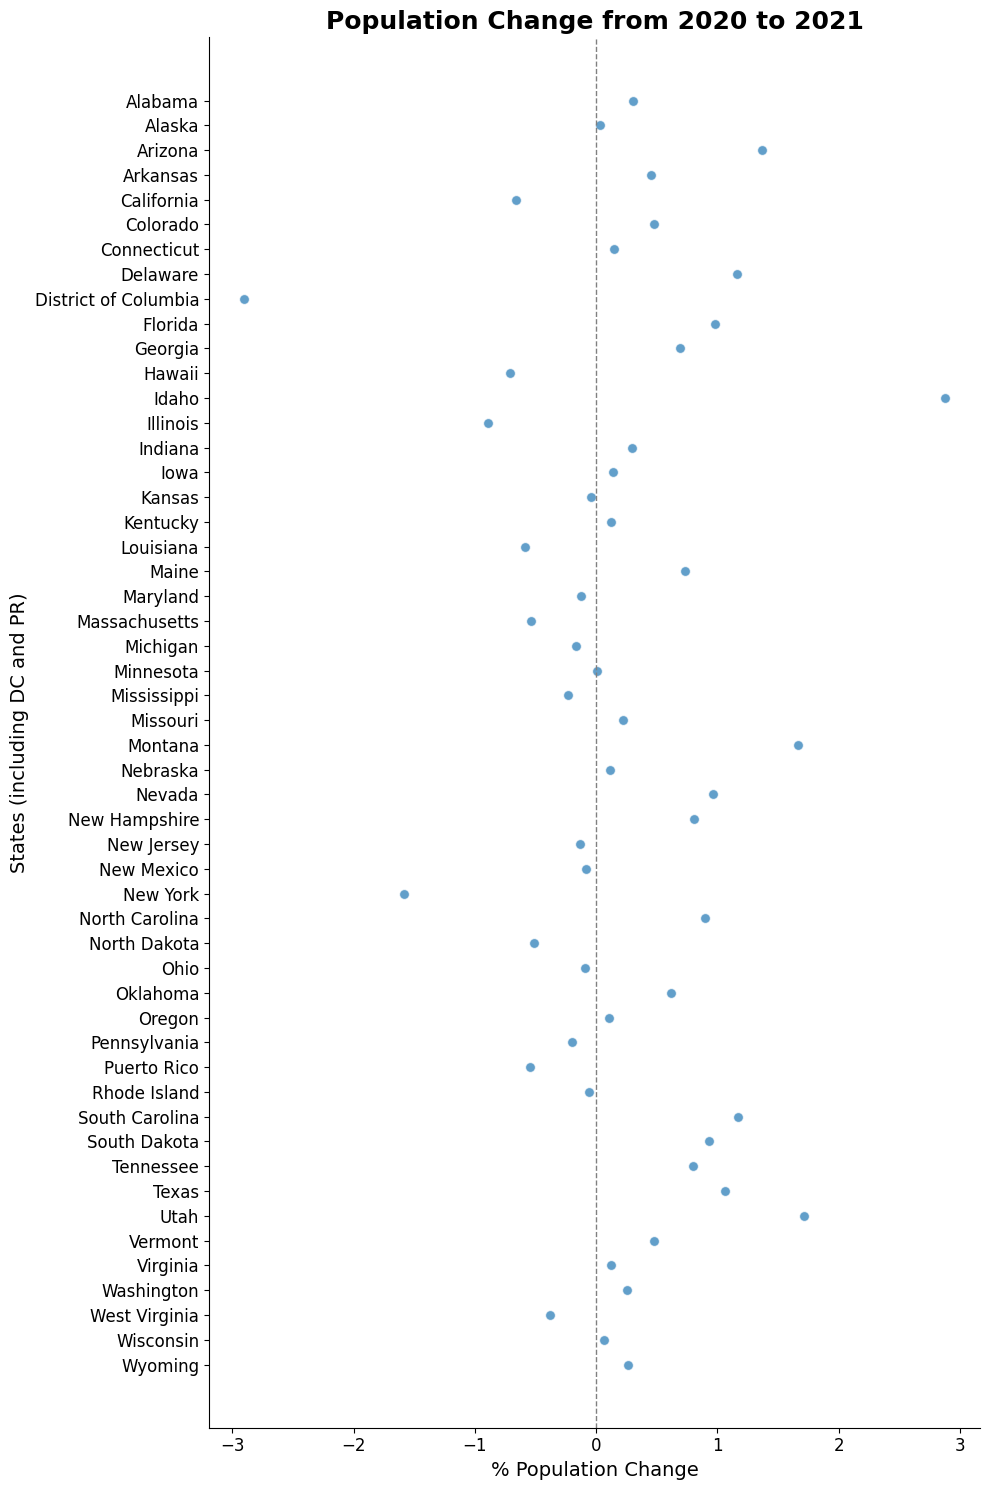

In [12]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 15))

# Create the scatter plot with enhanced marker style
ax.scatter(
    populationChange, 
    stateName, 
    color="#1f77b4",
    alpha=0.7,
    s=50,
    edgecolor='white',
    linewidth=0.8
)

# Add a vertical line at x=0 for reference
ax.axvline(0, color='gray', linestyle='--', linewidth=1)

# Set titles and labels with larger fonts and bold title for emphasis
ax.set_title("Population Change from 2020 to 2021", fontsize=18, fontweight='bold', color='k')
ax.set_xlabel("% Population Change", fontsize=14, color='k')
ax.set_ylabel("States (including DC and PR)", fontsize=14, color='k')

# Remove top and right spines for a cleaner appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase tick label sizes
ax.tick_params(axis='both', which='major', labelsize=12)

# Improve spacing for a tight layout
plt.tight_layout()

# Display the plot
plt.show()